## SIT 789 Task 3.1P

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Read empire.jpg image and convert into gray scale

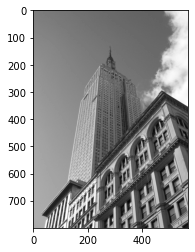

In [2]:
img = cv.imread('empire.jpg') #load image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, 'gray')

Parameter for Harris Corner detection

In [3]:
local_region_size = 3 #size of local image regions W introduced in slide 6 in week 3 slides
kernel_size = 3 #kernel size of Sobel kernels used for calculating derivatives I_x and I_y
k = 0.04 #parameter k in side 6 in week 3 slides
threshold = 1000.0 #threshold theta introduced in slide 6 in week 3 slides

In [4]:
img_gray = np.float32(img_gray)

Compute the Harris Corner response

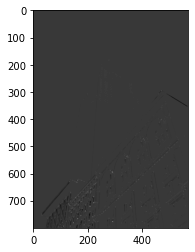

In [5]:
Harris_res_img = cv.cornerHarris(img_gray, local_region_size, kernel_size, k)
plt.imshow(Harris_res_img, 'gray')

Highlight the corners detected

In [6]:
def get_detected_corners(threshold):
    highlighted_colour = [0, 0, 255] # a colour is a combination of blue, green, red; red=[0,0,255]
    highlighted_img = img.copy()
    highlighted_img[Harris_res_img > threshold] = highlighted_colour
    plt.imshow(highlighted_img[:,:,::-1]) # RGB-> BGR

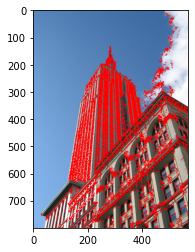

In [7]:
get_detected_corners(threshold)

Number of Harris Corner using for loop

In [8]:
number_of_corners = 0
for pixels in Harris_res_img:
    for pixel_value in pixels:
        if pixel_value > threshold:
            number_of_corners += 1

print("Number of Harris Corners detected", number_of_corners)

Number of Harris Corners detected 87282


Number of Harris Corner using numpy

In [9]:
number_of_harris_corners = Harris_res_img > threshold
print('Number of Harris Corners', number_of_harris_corners.sum())
harris_corners = {}
harris_corners[threshold] = number_of_harris_corners.sum()

Number of Harris Corners 87282


Adaptive Threshold

Threshold value 94003.416
Number of Harris Corners 39280


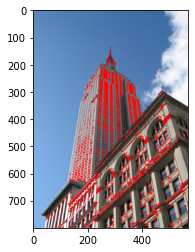

In [10]:
threshold = 0.001 * Harris_res_img.max()
print('Threshold value', threshold)
get_detected_corners(threshold)
number_of_harris_corners = Harris_res_img > threshold
print('Number of Harris Corners', number_of_harris_corners.sum())
harris_corners[threshold] = number_of_harris_corners.sum()

Threshold value 940034.16
Number of Harris Corners 10896


{1000.0: 87282, 94003.416: 39280, 940034.16: 10896}

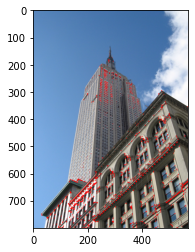

In [11]:
threshold = 0.01 * Harris_res_img.max()
print('Threshold value', threshold)
get_detected_corners(threshold)
number_of_harris_corners = Harris_res_img > threshold
print('Number of Harris Corners', number_of_harris_corners.sum())
harris_corners[threshold] = number_of_harris_corners.sum()
harris_corners

Threshold value 9400341.6
Number of Harris Corners 909


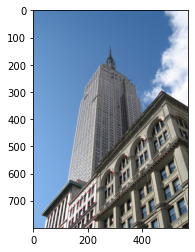

In [12]:
threshold = 0.1 * Harris_res_img.max()
print('Threshold value', threshold)
get_detected_corners(threshold)
number_of_harris_corners = Harris_res_img > threshold
print('Number of Harris Corners', number_of_harris_corners.sum())
harris_corners[threshold] = number_of_harris_corners.sum()

{1000.0: 87282, 94003.416: 39280, 940034.16: 10896, 9400341.6: 909}


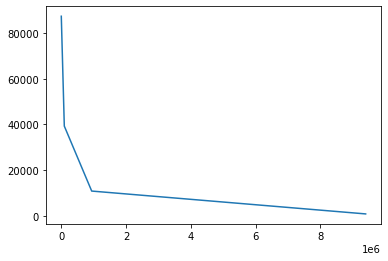

In [13]:
print(harris_corners)
lists = sorted(harris_corners.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

### SIFT

In [14]:
sift = cv.xfeatures2d.SIFT_create()

Keypoint detection

In [15]:
# You need re-create img_gray as its previous version have been converted to float
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
kp = sift.detect(img_gray, None)

Number of detected keypoints: 2804


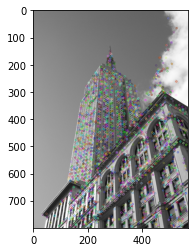

In [16]:
img_gray_kp = img_gray.copy()
img_gray_kp = cv.drawKeypoints(img_gray, kp, img_gray_kp)
plt.imshow(img_gray_kp)
print("Number of detected keypoints: %d" % (len(kp)))

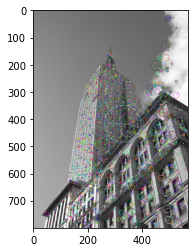

In [17]:
img_gray_kp = cv.drawKeypoints(img_gray, kp, img_gray_kp, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_gray_kp)

Descriptor computation

In [18]:
kp, des = sift.compute(img_gray, kp)

In [19]:
print(des.shape)

(2804, 128)


Ablation study

In [20]:
img_45 = cv.imread('empire_45.jpg')
img_zoomedout = cv.imread('empire_zoomedout.jpg')
img_45_gray = cv.cvtColor(img_45, cv.COLOR_BGR2GRAY)
img_zoomedout_gray = cv.cvtColor(img_zoomedout, cv.COLOR_BGR2GRAY)
img_another = cv.imread('fisherman.jpg')
img_another_gray = cv.cvtColor(img_another, cv.COLOR_BGR2GRAY)

In [21]:
kp_45, des_45 = sift.detectAndCompute(img_45_gray, None)
kp_zoomedout, des_zoomedout = sift.detectAndCompute(img_zoomedout_gray, None)
kp_another, des_another = sift.detectAndCompute(img_another_gray, None)

In [22]:
print("The number of keypoints in img_gray is %d" % (len(des)))
print("The number of keypoints in img_45_gray is %d" % (len(des_45)))

The number of keypoints in img_gray is 2804
The number of keypoints in img_45_gray is 3290


Hausdorff distance

In [23]:
from scipy.spatial.distance import directed_hausdorff

In [24]:
directed_hausdorff(des, des_45)

(399.7674323903837, 2700, 2437)

In [25]:
directed_hausdorff(des, des_zoomedout)

(401.33651715237676, 309, 1324)

In [26]:
directed_hausdorff(des, des_another)

(433.89630097524457, 2547, 524)